Status: ✅ Done

## Exercises 3: Linear Regression

The following lab-session is adapted from that of Section 3.6 in Introduction to Statistical Learning with R.


We use the Boston data set, which records `medv` (median house value) for 506 census tracts in Boston. We will seek to predict
medv using 12 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).


(A useful reference for working with linear regressions in statsmodels is https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html)



In [ ]:
# Import relevant packages
import numpy as np
from pandas import read_csv, DataFrame
from math import log, sqrt
import matplotlib.pyplot as plt

import statsmodels.api as sm
## to be able to specify models as Y ~ lstat we need the formula API
from statsmodels.formula.api import ols 

In [ ]:
# Load data from csv; change the directory as you need!
Boston = read_csv("Boston.csv")
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Simple Linear Regression (i.e. with one explanatory variable)

We will start by fitting a simple linear regression model, with `medv` as the response and `lstat`  as the predictor: $medv = \beta_0 + \beta_1 lstat + \epsilon$

First plot the response `medv` against `lstat` and see what the relationship looks like, so that you have an idea what the result may be.

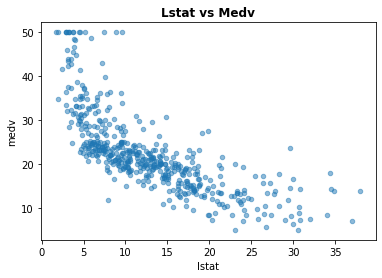

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv', alpha=.5)
ax.set_title('Lstat vs Medv', weight = 'bold');

In [ ]:
X = Boston['lstat']
## Need an intercept in the model, so we add the constant feature 
X = sm.add_constant(X)
sm_model = sm.OLS(Boston['medv'], X)
lm1 = sm_model.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           5.08e-88
Time:                        19:23:19   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Alternatively specify via the formula API
ols("medv ~ 1 + lstat", Boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           5.08e-88
Time:                        19:23:19   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can also get the estimated parameters directly from the model. A confidence interval for model coefficients is found in the model summary. 

In [ ]:
## Coefficients beta:
lm1.params

const    34.553841
lstat    -0.950049
dtype: float64

Standard error of residuals -- the square root of the estimated variance $\sigma^2$

In [ ]:
sqrt(lm1.mse_resid)

6.215760405398068

In [ ]:
## Estimated variance mse_resid is computed as RSS divided by the residual degrees of freedom 
## (found as "DF residuals" in summary and df_resid in model object
(lm1.resid**2).sum()/lm1.df_resid

38.63567741731437

In [ ]:
## Yet another way of obtaining the variance 
lm1.ssr/lm1.df_resid

38.63567741731436

##  Predictions, confidence intervals, and prediction intervals

We can get a prediction--the estimated mean value of `medv` for a specific value of `lstat`--for any new datapoint. To get an idea of uncertainty in the model, we can look at 
- a confidence interval for the value of the regression line to indicate how much the line itself would vary if fitted on new data.
- a prediction interval to indicates the range in which we expect the outcome to fall. 

Here we compute the 95% confidence- and prediction intervals (specified as alpha = 0.05 = 1-0.95)

- A. Make again a scatterplot of `medv` against `lstat` and draw the regression line on top using get_prediction() to calculate the fitted values (if you just want them for the data that you used for fitting the model, you could also get them directly from the model object as `fittedvalues`). Here is an example predicting on the observations in the Boston data set -- try to replace `X` with a new dataset containing your favourite values of the explanatory variable. 
- B. Add two curves to show the upper and lower confidence limits as a function of `lstat`.
- C. Add two curves to show the upper and lower prediction limits as well.

Comment on the plot and, in particular, note how the prediction intervals contain the confidence interval for the predicted value.

**Ludek's note**: for very nice and clean explanation about `confidence` and `prediction` interval, check this [article](https://towardsdatascience.com/confidence-intervals-vs-prediction-intervals-7b296ae58745).

In [ ]:
# Ludek's note: allows you to then easily plot the fitted line
Xsort = X.sort_values(by='lstat')

In [ ]:
## Predicting on a new dataset (here just the original one X)
pred1 = lm1.get_prediction(Xsort) # X replaced by Xsort
## Results of prediction in a dataframe
pred1_df = pred1.summary_frame(alpha=0.05)
pred1_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
161,32.910255,0.505330,31.917443,33.903068,20.657972,45.162539
162,32.729746,0.499184,31.749008,33.710485,20.478436,44.981057
40,32.672743,0.497251,31.695804,33.649682,20.421736,44.923750
232,32.207219,0.481587,31.261054,33.153384,19.958628,44.455810
192,31.827199,0.468982,30.905799,32.748600,19.580496,44.073903


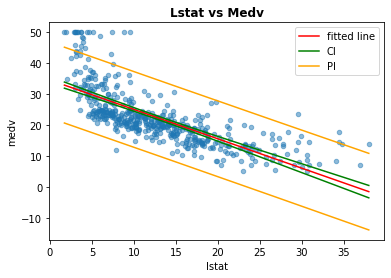

In [ ]:
# A. Your code here
ax = Boston.plot.scatter('lstat', 'medv', alpha=.5)
ax.plot(Xsort['lstat'], pred1_df['mean'], color='red', label='fitted line')
ax.set_title('Lstat vs Medv', weight = 'bold');

# B. Your code here
ax.plot(Xsort['lstat'], pred1_df['mean_ci_lower'], color='green', label='CI');
ax.plot(Xsort['lstat'], pred1_df['mean_ci_upper'], color='green');

# C. Your code here
ax.plot(Xsort['lstat'], pred1_df['obs_ci_lower'], color='orange', label='PI');
ax.plot(Xsort['lstat'], pred1_df['obs_ci_upper'], color='orange');

ax.legend();

## Model checking methods

We can obtain relevant quantities either directly from the results of a linear model or from its method get_influence(). Here is an overview.

From the model fit we have
- Raw residuals: resid

From get_influence() we have 
- Studentized residuals: resid_studentized_internal ($\beta$ estimated leaving out observation $i$)
- Externally studentized residuals: resid_studentized_external ($\beta$ and $\sigma^2$ both estimated leaving out observation $i$)
- hatvalues: This is also called leverage and are the diagonal elements $h_{ii}$ of the hatmatrix $X(X^TX)X^T$. Obtained as hat_matrix_diag
- Cook's distance: cooks_distance

To get the classical standardised residuals $e_i/\sqrt{\hat\sigma^2(1-h_{ii})}$ we seem to need to do the scaling ourselves. 

In [ ]:
infl = lm1.get_influence()

## Obtaining standardised residuals
SE_of_residuals = np.sqrt(lm1.mse_resid*(1-infl.hat_matrix_diag))
stdres = np.divide(lm1.resid, SE_of_residuals)

### Is the assumption of Gaussian errors reasonable? 
Compare standardised residuals to a standard normal distribution

Plot the standardised residuals ordered from smallest to highest against the quantiles from a standard normal distribution. To get the latter, for N datapoints (and thus N residuals) in your data you compute the standard normal quantile for the N probabilities (1/(N+1), ..., N/(N+1)). It is good practice to make the plot square. Statsmodels also has a built-in function to make this quantile-quantile plot.

What do you see?

**Solution**

We can see a non-linear line and as such, our assumption about gausian distributed errors might not be correct.

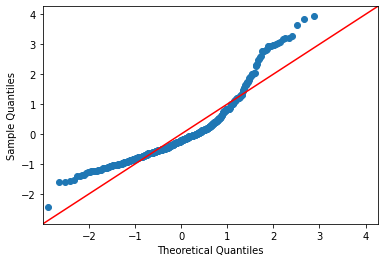

In [ ]:
sm.qqplot(stdres, line='45'); ## Compare to standard normal distribution

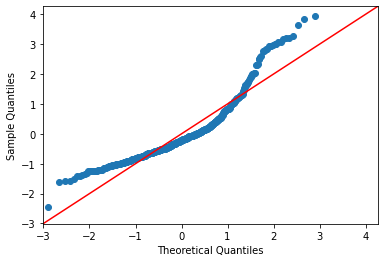

In [ ]:
## We can also use the studentized residuals for this kind of check. 
## With this much data, it will not make much of a difference. 
## They should be compared to a t-distribution with n-p-1 degrees of freedom (df_resid)
import scipy.stats as stats
sm.qqplot(lm1.get_influence().resid_studentized_internal, # observed residuals 
          stats.t, distargs=(lm1.df_resid,), #compare with quantiles of t-distribution 
          line = '45'  #reference line
         );

### Is there any systematic trend in the residuals?

To inspect this, make the following two types of plots:
1. The raw residuals $y_i- \hat y_i$ against the explanatory variable `lstat`.
2. The raw residuals against the fitted values $\hat y_i$. 

The first type of plot is relatively straightforward in revealing whether variation is small or large for certain values of the explanatory variables. It can require a bit of practice to interpret systematic trends in the second plot, but think of it as inspecting variation around the regression surface at different heights of the surface.

In the plots, try to assess whether
- there are any curvatures or other trends; the points should be nicely scattered around a horizontal line in 0.
- there is evidence of non-homogeneous variance

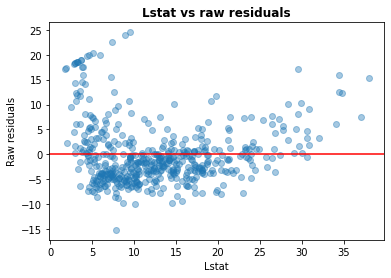

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X['lstat'],lm1.resid, alpha=.4);
plt.axhline(y=0, color='r', linestyle='-')
ax.set_ylabel('Raw residuals');
ax.set_xlabel('Lstat');
ax.set_title('Lstat vs raw residuals', weight='bold');

**Solution** Clearly, we can see that the points are not scattered randomly around zero. For instance, for small values of `lstat` we can see that residuals are large, same goes on the opposite site. Where as in the middle, the residuals are close to zero. This might be caused by distribution of the samples, where we have a lot of points in the middle but not so many on either of the ends. As such, there is not enough points to learn how to handle these `edge cases`.

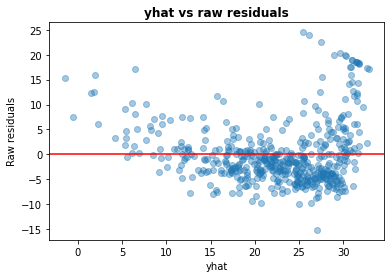

In [ ]:
fig, ax = plt.subplots()
yhat = lm1.get_prediction(X).predicted_mean
ax.scatter(yhat,lm1.resid, alpha=.4);
plt.axhline(y=0, color='r', linestyle='-')
ax.set_ylabel('Raw residuals');
ax.set_xlabel('yhat');
ax.set_title('yhat vs raw residuals', weight='bold');

**Solution** Here we can see that as the prediction value increases towards the very end, the raw residuals become larger and larger. Therefore, we can not again say that points are randomly scattered. 

### Influential observations

You can think of leverage (diagonal elements of the hat matrix) as flags for *potentially* influential observations. Leverages are always bigger than 1/n, and they sum to the number of variables in the model, $p$. If the observation **also has a high studentized residual** --- the residual obtained when using the regression fitted *without the observation* $(x_i, y_i)$ --- then it is likely to act like a magnet on the regression surface. Cook's distance is a measure that in effect flags observation with high leverage and large residuals. 

Taking the observations in any order (for instance row index), make three plots on top of each other: 
1. Leverage (hatvalues) against index
2. Studentized residuals against index
3. Cooks distance against index

**Solution**

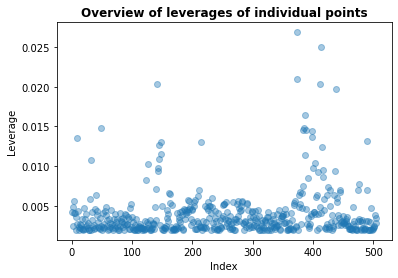

In [ ]:
fig, ax = plt.subplots();
ax.scatter(X.index,infl.hat_matrix_diag, alpha=.4);
ax.set_xlabel('Index');
ax.set_ylabel('Leverage');
ax.set_title('Overview of leverages of individual points', weight='bold');

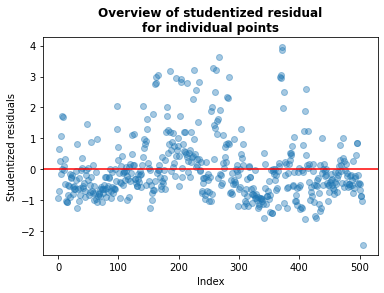

In [ ]:
fig, ax = plt.subplots();
ax.scatter(X.index,infl.resid_studentized, alpha=.4);
plt.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Index');
ax.set_ylabel('Studentized residuals');
ax.set_title('Overview of studentized residual\nfor individual points', weight='bold');

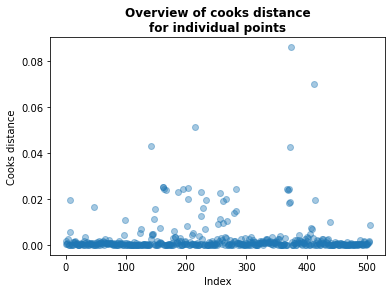

In [ ]:
fig, ax = plt.subplots();
ax.scatter(X.index,infl.cooks_distance[0], alpha=.4); # Second array represents p-values
ax.set_xlabel('Index');
ax.set_ylabel('Cooks distance');
ax.set_title('Overview of cooks distance\nfor individual points', weight='bold');

## Multiple Linear Regression (i.e. with multiple explanatory variables)

Now we make more complex models. 

Fit a model `lm2` that includes both `age` and `lstat`.

Fit then model `lm3` in which they enter also as a product (interaction). Note that if you include `lstat*age` using the formula API, then `lstat` and `age` are automatically added to the model -- a nice thing about formula APIs is that we only need to specify these highest order interactions.

**Solution**

In [ ]:
lm2 = ols("medv ~ 1 + lstat + age", Boston).fit()
lm3 = ols("medv ~ 1 + lstat + age + I(lstat*age)", Boston).fit()

### Non-linear transformations of the explanatory variables

We now perform a regression of `medv` onto `lstat` and `lstat` squared. 

Given a predictor $X$, we can create a predictor $X^2$ using
 `I(X**2)` in the formula API. The function `I()` is needed to protect the math formula inside.
 
When building models in practice, consider shifting your explanatory variables so that the intercept has a more interpretable meaning. For example, age=0 is rarely interesting, whereas age=25 or age="median value of the observed in our study" might very well be. Typically we would center them around the mean, the median or a value with some nice interpretation. It can also help on numerical stability, especially when fitting polynomials where values get more extreme.

In [ ]:
lm4 = ols("medv ~ lstat + I(lstat**2)", Boston).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.56e-112
Time:                        19:23:21   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Comparing two nested models against each other

Consider the two models `lm1` and `lm4` above. The model `lm1` is nested into `lm4`, since it corresponds to setting the coefficient for the squared term to zero. We here discuss three possible ways of comparing the two models, but note that there are many more (see the book for details).

### Method 1: A t-test for whether a specific coefficient is zero ($\beta_j = 0$)

We can see from the summary of model lm4 that the squared term is highly significant. 
**Ludek's note:** See $$P>|t|$$ (this a p-value - since it is pretty much zero, we can reject null hypothesis $$H_0: B_j = 0$$ in favor of alternative hypothesis - $$B_j$$ should be non-zero)

### Method 2: An F-test for whether several coefficients are zero 

The F-test based on sums of squares is much more general, in that it allows us to perform a single test addressing whether several coefficients could be zero. This could be because you want to remove several explanatory variables, or because you want to remove a single categorical variable with several groups. Even if we want to test just one coefficient, the F-test is preferable to the t-test. 

In [ ]:
## output is (F-statistic, p-value of the test, degrees of freedom)
## Here we have removed just one parameter, so the degrees of freedom is 1.
lm4.compare_f_test(lm1)

(135.19982210087164, 7.630115993367343e-28, 1.0)

In [ ]:
## Using formula (3.24) in ISLwR
difference_in_RSS = lm1.ssr - lm4.ssr
drop_in_parameters = lm1.df_resid - lm4.df_resid
residual_standard_error = lm4.mse_resid

(difference_in_RSS/drop_in_parameters)/residual_standard_error

135.19982210087164

The model summary always displays the F-test for removing *all* features of the model, i.e. that *all* coefficients are zero. The test simply compares the model to the "empty model" with no features and only an intercept.

In [ ]:
lm4.mse_model/lm4.mse_resid 

448.5050879502775

### Method 3: Comparing by an information criterion

We can also compare models without using tests but rather some kind of "score" -- an information criterion -- such as AIC or BIC. For this comparison, **the models do not have to be nested**. 

Lower AIC is better, so we conclude also from this comparison that the model with a square term is preferred.

In [ ]:
(lm4.aic, lm1.aic)

(3168.5159568137046, 3286.974956900157)

## Can you make a model that fits well?

Try using the techniques for model checking and testing to guide you towards a well-fitting model.

**Solution**
Let's start with restating the problem we want to solve again:

> Given [Boston dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) describing areas in Boston from different angles such as average number of rooms per dwelling, per capita crime rate by town, etc., we want to predict `median value of owner-occupied homes in $1000's`

In [ ]:
# We can discuss in the class :)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d2e2029-1356-4196-bc77-add9a1a749a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>